In [31]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.layers import Dense
import matplotlib.colors as colors
wells = []
##global scope variable for the path to where all the well data is stored
_PATH = "Data/"

# <span style="color:blue">This is a well class that will hold all the properties of a well and also will be able to perform relevant calculations for a given well</span>

In [32]:
class Well:
    ##This is a well class that will hold all the properties of a well
    ##and also will be able to do relevant calculations for a given well
    
    ##Once the data is set in the constructor, please do not change the values when they are accessed.
    ##Apparently I can't prevent this in Python, but I can at least advise against it.
    
    def __init__(self, easting, northing, porosity, permeability, PR, YM, wSaturation, oSaturation, thickness, proppant,
                 pumpRate, name, RF, Pa, FVF, oilByMonth, waterByMonth):
        self.easting = easting ##easting, areas with higher
        self.northing = northing ##northing, areas with higher
        self.porosity = porosity ##porosity, definitely something there
        self.permeability = permeability ##permeability,definitely something there
        self.PR = PR ##poissons's ratio, might be something. couple of outliers but general convergence
        self.YM = YM ##young's modulus, pyramid shape, probably something
        self.wSaturation = wSaturation ##water saturation, no correlation to production
        self.oSaturation = oSaturation ##oil saturation, no correlation to production
        self.thickness = thickness ##thickness, no correlation to production
        self.proppant = proppant ##proppant weight, maybe a correlation
        self.pumpRate = pumpRate ##pumpRate, probably a correlation
        self.name = name ##name
        self.RF = RF ##recovery factor, maybe something
        self.Pa = Pa ##average pressure, probably something
        self.FVF = FVF ##formation volume factor
        self.oilByMonth = oilByMonth ##oil produced in each month
        self.waterByMonth = waterByMonth ##water produced in each month
    
    ##returns the length of the well
    def getWellLength(self):
        return self.easting.max()-self.easting.min()
    
    #returns the total oil produced by the well
    def getTotalProduction(self):
        return self.oilByMonth.sum()
    
    ##returns the oil in place for this given well
    def getOilInPlace(self):
        return ((7758 * 360 * self.thickness.mean() * self.porosity.mean() * (1 - self.wSaturation.mean())) / self.FVF)
    
    ##returns the recoverable reserves of this well
    def getRecoverableReserves(self):
        return (self.getOilInPlace() * self.RF)
    
    ##Returns the production rate
    def InitialProduction(self):
        return (self.oilByMonth[0] * (math.exp((-1 * ((self.oilByMonth[11] - self.oilByMonth[0]) / 12) * time))))
        ##need to figure out how to plug in time (otherwise it will always equal first month production). also could be used
        ##to find the decline over time (where time is difference in production)
    
    ##Returns the economic limit of production
    def economicLimitROP(self):
        sumOilProduction = 0 
        for i in range(12):
            oil = getOilAtMonth(self, i)
            water = getWaterAtMonth(self, i)
            sumOilProduction += oil
            if(oil < water):
                return sumOilProduction
    
    ##Returns time in years
    def LifeOfReservoir(self):
        return ((1 / ((self.oilByMonth[11] - self.oilByMonth[0]) / 12)) * math.log((self.oilbyMonth[0]) / economicLimitROP(self)))
    
    ##Returns cumulative production in bbl
    def CumulativeProduction(self):
        return ((self.oilbyMonth[0] / declineRate) * math.log(self.oilbyMonth[0] / self.oilbyMonth[11]))
    
    ##this is the kind of functioning as a toString right now, almost no reason for it
    def getName(self):
        return self.name
    
    ##method to return oil produced in a given month
    def getOilAtMonth(self, n):
        if n > 12 or n < 1:
            ##bad
            return -1
        else:
            return self.oilByMonth[n]
    
    ##method to return water produced in a given month
    def getOilAtMonth(self, n):
        if n > 12 or n < 1:
            ##bad
            return -1
        else:
            return self.waterByMonth[n]
    
    ##method to display data for this well
    ##depth will be for getiing data at a given depth in a well. Not sure if or when I should implement this
    def displayData(self, depth = 0):
        if depth == 0:
            data = pd.read_csv(_PATH + self.name + ".csv")
        else:
            data = pd.read_csv(_PATH + self.name + ".csv")
            
        print("Displaying data for: " + self.name)
        print(data)
    
    ##Returns the number of frac stages for a well
    def getFracStages(self):
        count = 0
        for rate in self.pumpRate:
            if (pd.notnull(rate)):
                count+=1
        return count
    
    ##Returns the mean pump rate of a well
    def getAvgPumpRate(self):
        return self.pumpRate.mean(skipna = True)
    
    ##Returns the mean amount of proppant used in a well
    def getAvgProppant(self):
        return self.proppant.mean(skipna = True)
    
    ##Returns the mean easting coordinate value of a well
    def eastingAvg(self):
        return np.array(self.easting).mean()
    
    ##Returns the mean northing coordinate value of a well
    def northingAvg(self):
        return np.array(self.northing).mean()
    
    ##Returns the mean porosity value of a well
    def porosityAvg(self):
        return np.array(self.porosity).mean()
    
    ##Returns the mean permeability value of a well
    def permeabilityAvg(self):
        return np.array(self.permeability).mean()

    ##method to take the data given, create a well object and store it in wells
    def createWells():
        wellProduction = pd.read_csv(_PATH + "well production.csv")
        for i in range(100):
        ##for every well
            ##get all the data from the well production csv
            name = wellProduction.at[i, "well name"]
            ap = wellProduction.at[i, "average pressure (Pa)"]
            RF = wellProduction.at[i, "recovery factor"]
            FVF = wellProduction.at[i, "formation volume factor"]
            oil = wellProduction.iloc[i, 4:16] ##oil per month
            water = wellProduction.iloc[i, 16:28] ##water per month
            ##now that we have the name of the well, we can use that to access its
            ##own csv file and get that data
            wellDF = pd.read_csv(_PATH + name + ".csv")
            e = wellDF["easting"]
            n = wellDF["northing"]
            p = wellDF["porosity"]
            perm = wellDF["permeability"]
            pr = wellDF["Poisson's ratio"]
            ym = wellDF["Young's Modulus"]
            ws = wellDF["water saturation"]
            os = wellDF["oil saturation"]
            thick = wellDF["thickness (ft)"]
            prop = wellDF["proppant weight (lbs)"]
            pump = wellDF["pump rate (cubic feet/min)"]
            ##create a new well
            temp = Well(e, n, p, perm, pr, ym, ws, os, thick, prop, pump, name, RF, ap, FVF, oil, water)
            ##append the new well to the list
            wells.append(temp)

    createWells()

# <span style="color:blue">This is a generalized function that facilitates easy graphing of any 2 variables</span> 

In [33]:
bottom = cm.get_cmap('Oranges', 128)
newcolors = np.vstack((bottom(np.linspace(0, 1, 128))))[32:127]
newcmp = ListedColormap(newcolors, name='DarkerOrange')

def makeGraph(xProp, xIsMethod, yProp, yIsMethod, xLabel, yLabel, zProp=-1, zIsMethod=-1, zRepeat=1, zLabel=""):
    #Graph anything
    xCoords = []
    yCoords = []
    zCoords = []
    for well in wells:
        xAttr = getattr(well, xProp)
        yAttr = getattr(well, yProp)
        zAttr = getattr(well, zProp) if zProp is not -1 else -1
        xCoords.append(xAttr() if xIsMethod else xAttr)
        yCoords.append(yAttr() if yIsMethod else yAttr)
        zCoords.append(zAttr() if zIsMethod else zAttr) if zAttr is not -1 else -1
    xCoords = np.array(xCoords).reshape(-1)
    yCoords = np.array(yCoords).reshape(-1)
    zCoords = np.array(zCoords).repeat(zRepeat).reshape(-1)
    plt.figure(dpi=100)
    if zAttr is -1:
        plt.scatter(xCoords, yCoords, s = 4)
    else:
        plt.scatter(xCoords, yCoords, s = 4, c=zCoords, cmap=newcmp)
        plt.colorbar().set_label(zLabel)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)

# <span style="color:blue">Total Production (bbl) vs Easting (ft)</span>

In [34]:
makeGraph("eastingAvg", True, "getTotalProduction", True, "Easting", "Total Production")

AttributeError: 'Well' object has no attribute 'eastingAvg'

# <span style="color:blue">Total Production (bbl) vs Northing (ft)</span>

In [ ]:
makeGraph("northingAvg", True, "getTotalProduction", True, "Northing", "Total Production")

# <span style="color:blue">Location of wells colored by Permeability 

In [ ]:
makeGraph("easting", False, "northing", False, "Easting", "Northing", zProp="permeabilityAvg", zIsMethod=True, zRepeat=100, zLabel="Permeability Avg")

# <span style="color:blue">Location of wells colored by Total Production (bbl)</span>

In [ ]:
makeGraph("easting", False, "northing", False, "Easting", "Northing", zProp="getTotalProduction", zIsMethod=True, zRepeat=100, zLabel="Total Oil Production")

# <span style="color:blue">Total Production (bbl) vs Well Length (ft)</span>

In [ ]:
makeGraph("getWellLength", True, "getTotalProduction", True, "Well Length", "Total Production")

# <span style="color:blue">Frequency Plot of Well Lengths (ft)</span>

In [ ]:
lengths = []
for well in wells:
    lengths.append(well.getWellLength())
plt.hist(lengths);
plt.xlabel("Well Length")
plt.ylabel("# of Occurrences");

# <span style="color:blue">Total Production (bbl) vs Mean Pump Rate (ft<sup>3</sup>/min)</span>

In [ ]:
makeGraph("getAvgPumpRate", True, "getTotalProduction", True, "Average Pump Rate", "Total Production")

# <span style="color:blue">Total Production (bbl) vs Mean Proppant (lbs)</span>

In [ ]:
makeGraph("getAvgProppant", True, "getTotalProduction", True, "Average Proppant", "Total Production")

# <span style="color:blue">Total Production (bbl) vs Number of Frac Stages</span>

In [ ]:
makeGraph("getFracStages", True, "getTotalProduction", True, "# Frac Stages", "Total Production")

# <span style="color:blue">Gaussian Fit</span>

In [ ]:
class Well:
    ##This is a well class that will hold all the properties of a well
    ##and also will be able to do relevant calculations for a given well
    
    ##Once the data is set in the constructor, please do not change the values when they are accessed.
    ##Apparently I can't prevent this in Python, but I can at least advise against it.
    
    def __init__(self, easting, northing, porosity, permeability, PR, YM, wSaturation, oSaturation, thickness, proppant,
                 pumpRate, name, RF, Pa, FVF, oilByMonth, waterByMonth):
        self.easting = easting ##easting
        self.northing = northing ##northing
        self.porosity = porosity ##porosity
        self.permeability = permeability ##permeability
        self.PR = PR ##poissons's ratio
        self.YM = YM ##young's modulus
        self.wSaturation = wSaturation ##water saturation
        self.oSaturation = oSaturation ##oil saturation
        self.thickness = thickness ##thickness
        self.proppant = proppant ##proppant weight
        self.pumpRate = pumpRate ##pumpRate
        self.name = name ##name
        self.RF = RF ##recovery factor
        self.Pa = Pa ##average pressure
        self.FVF = FVF ##formation volume factor
        self.oilByMonth = oilByMonth ##oil produced in each month
        self.waterByMonth = waterByMonth ##water produced in each month
    
    ##returns the length of the well
    def getWellLength(self):
        return self.easting.max()-self.easting.min()
    
    #returns the total oil produced by the well
    def getTotalProduction(self):
        return self.oilByMonth.sum()
    
    ##returns the oil in place for this given well
    def getOilInPlace(self):
        return ((7758 * 360 * self.thickness * self.porosity * (1 - self.wSaturation)) / self.FVF)
    
    ##returns the recoverable reserves of this well
    def getRecoverableReserves():
        return (getOriginalOilPlace() * RF)
    
    ##returns rate of initial production for this well
    def getROIP():
        pass 
    
    ##returns the life of this reservoir
    def getLR():
        pass
    
    ##returns the cumulative production of this well
    def getCP():
        pass
    
    
    
    def getFracStages(self):
        count = 0
        for rate in self.pumpRate:
            if (pd.notnull(rate)):
                count+=1
        return count
    
    def getAvgPumpRate(self):
        return self.pumpRate.mean(skipna = True)
    
    def getAvgProppant(self):
        return self.proppant.mean(skipna = True)
    
    
    ##this is the kind of functioning as a toString right now, almost no reason for it
    def getName(self):
        return self.name
    
    ##method to return oil produced in a given month
    def getOilAtMonth(self, n):
        if n > 12 or n < 1:
            ##bad
            return -1
        else:
            return self.oilByMonth[n]
    
    ##method to return water produced in a given month
    def getOilAtMonth(self, n):
        if n > 12 or n < 1:
            ##bad
            return -1
        else:
            return self.waterByMonth[n]
    
    ##method to display data for this well
    ##depth will be for getiing data at a given depth in a well. Not sure if or when I should implement this
    def displayData(self, depth = 0):
        if depth == 0:
            data = pd.read_csv(_PATH + self.name + ".csv")
        else:
            data = pd.read_csv(_PATH + self.name + ".csv")
            
        print("Displaying data for: " + self.name)
        print(data)

# <span style="color:blue">Gets outline Points</span>

In [27]:
def sparseMax(xCoords1, yCoords1, sparseness):
    newX = []
    newY = []
    for i in range(len(yCoords1)//sparseness):
        index = i*sparseness
        max = 0
        maxInd = index
        #meanX = 0
        #meanY = 0
        for j in range(sparseness):
            if(yCoords1[index+j] > max):
                max = yCoords1[index+j]
                maxInd = index+j
            #meanX += xCoords[index+j]
            #meanY += yCoords[index+j]
        #meanX /= sparseness
        #meanY /= sparseness
        newX.append(xCoords1[maxInd])
        newY.append(yCoords1[maxInd])
        #newX.append(meanX)
        #newY.append(meanY)
    return [newX, newY]

def sparseMax2(xCoords1, yCoords1, sparseness):
    newX = []
    newY = []
    xRange = max(xCoords1)-min(xCoords1)
    width = xRange/sparseness
    lastUpper = 0
    for i in range(sparseness):
        lower = min(xCoords1) + width*i
        upper = min(xCoords1) + width*(i+1)

        maxN = -1
        maxInd = -1
        for j in range(len(xCoords1)):
            if (xCoords1[j] >= lower and xCoords1[j] < upper):
                if (yCoords1[j] > maxN):
                    maxN = yCoords1[j]
                    maxInd = j
                    
        if (maxInd != -1):
            newX.append(xCoords1[maxInd])
            newY.append(yCoords1[maxInd])
        lastUpper = upper
    
    newX.append(xCoords1[len(xCoords1)-1])
    newY.append(yCoords1[len(yCoords1)-1]) 
    
    return [newX, newY]
        

def removeOutliers(xCoords, yCoords):
    newX = []
    newY = []
    q1 = py.quantile(yCoords, 0.25)
    q3 = py.quantile(yCoords, 0.75)
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    for i in range(len(yCoords)):
        if (yCoords[i] > lower and yCoords[i] < upper):
            newX.append(xCoords[i])
            newY.append(yCoords[i])
    return [newX, newY]

def getMaxLists(xCoords, yCoords):
    xCoords1 = []
    for val in xCoords:
        xCoords1.append(val)
    yCoords1 = [x for _,x in sorted(zip(xCoords,yCoords))]
    xCoords1.sort()
    #listA = removeOutliers(xCoords1, yCoords1)
    listA = [xCoords1, yCoords1]
    listZ = sparseMax2(listA[0], listA[1], 20)
    return listZ

In [38]:
# <span style="color:blue">Graph well length vs total production</span>

Text(0, 0.5, 'Total Production')

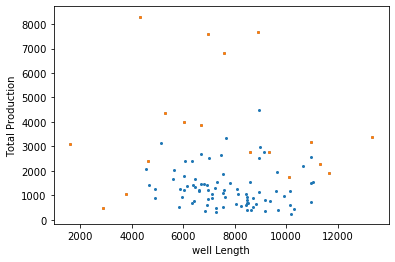

In [39]:
xCoordsShow = []
yCoordsShow = []
for well in wells:
    xCoordsShow.append(well.getWellLength())
    yCoordsShow.append(well.getTotalProduction())

lengthMax = getMaxLists(xCoordsShow, yCoordsShow)

plt.scatter(xCoordsShow, yCoordsShow, s = 4)
plt.scatter(lengthMax[0], lengthMax[1], s = 4)
plt.xlabel("well Length")
plt.ylabel("Total Production")

# <span style="color:blue">Location of wells colored by Pump Rate (ft<sup>3</sup>/min)</span>

In [ ]:
makeGraph("easting", False, "northing", False, "Easting", "Northing", zProp="pumpRate", zIsMethod=False, zLabel="Pump Rate")

# <span style="color:blue">Total Production (bbl) vs Mean Porosity</span>

In [ ]:
makeGraph("porosityAvg", True, "getTotalProduction", True, "Porosity Avg", "Total Production", zProp="permeabilityAvg", zIsMethod=True, zLabel="Permeability Avg")

# <span style="color:blue">Location of wells colored by Porosity</span>

In [ ]:
makeGraph("easting", False, "northing", False, "Easting", "Northing", zProp="porosity", zIsMethod=False, zLabel="Porosity")

# should we add a permeability location plot?

# <span style="color:blue">Making the 10 optimal wells</span>

In [ ]:
addedWells = [
    np.linspace([86430, 5000], [95430, 5000], 100),
    np.linspace([66000, 2000], [76000, 2000], 100),
    np.linspace([85500, 19500], [90500, 19500], 100),
    np.linspace([71500, 20275], [76000, 20275], 100),
    np.linspace([59750, 20750], [64250, 20750], 100),
    np.linspace([64000, 22500], [70500, 22500], 100),
    np.linspace([63000, 33500], [69000, 33500], 100),
    np.linspace([4125, 26000], [11875, 26000], 100),
    np.linspace([53000, 59250], [64750, 59250], 100),
    np.linspace([63750, 64750], [74250, 64750], 100)
]
addedWellClasses = [Well(adde[:,0], adde[:,1], None, None, None, None, None, None, None, None,
                 None, None, None, None, 1.6, None, None) for adde in addedWells]

# <span style="color:blue">Making the Neural Network</span>

In [ ]:
class NNetwork:
    def parseData(self, targetProperty, isTargetMethod, yLabel, yRepeat=1):
        self.yLabel = yLabel
        self.X = np.array([np.array([well.easting, well.northing]).transpose() for well in wells]).reshape(-1,2)
        self.y = np.array([np.array(getattr(well, targetProperty)).repeat(yRepeat) for well in wells]).reshape(-1)
        
        self.X = self.X[::25]
        self.y = self.y[::25]

        if isTargetMethod:
            self.y = np.array([a() for a in self.y])

        self.scalarX = MinMaxScaler()
        self.scalarX.fit(self.X)
        self.Xfit = self.scalarX.transform(self.X)
        self.scalarY = MinMaxScaler()
        self.scalarY.fit(self.y.reshape(-1,1))
        self.yfit = self.scalarY.transform(self.y.reshape(-1,1)).reshape(-1)

    def train(self):
        # Definition of our model
        self.model = keras.Sequential() # as first layer in a sequential model:
        # let's define our model:
        self.model.add( keras.layers.Dense( units=30, input_shape=(2,), activation="relu" ) )
        self.model.add( keras.layers.Dense( units=15, input_shape=(30,), activation="relu" ) )
        self.model.add( keras.layers.Dense( units=15, input_shape=(15,), activation="relu" ) )
        self.model.add( keras.layers.Dense( units=1, input_shape=(15,), activation="linear" ) )
        optimizer = keras.optimizers.Adam()
        self.model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
        self.model.fit(self.Xfit, self.yfit, epochs=3000, verbose=1, batch_size=200, validation_split = 0.1)

        
    def plotSimple(self):
        testX0 = np.linspace(min(self.Xfit[:,0]), max(self.Xfit[:,0]), 50)
        testX1 = np.linspace(min(self.Xfit[:,1]), max(self.Xfit[:,1]), 50)
        grid0, grid1 = np.meshgrid(testX0, testX1)
        cost = np.array([self.model.predict(np.array([grid0[i], grid1[i]]).transpose()).reshape(-1) for i in range(len(grid0))])
        plt.pcolormesh(grid0,grid1,cost, norm=colors.SymLogNorm(linthresh=10, linscale=1,
                                                  vmin=cost.min(), vmax=cost.max()))
        plt.scatter(self.Xfit[:,0], self.Xfit[:,1], c = self.yfit)
        plt.scatter(np.array([self.scalarX.transform(addedWell)[:,0] for addedWell in addedWells]).reshape(-1), np.array([self.scalarX.transform(addedWell)[:,1] for addedWell in addedWells]).reshape(-1), c="#A00000")
        plt.colorbar().set_label(self.yLabel)
        plt.xlabel("Easting")
        plt.ylabel("Northing")
        plt.show()
        
    # Doesn't work properly yet - don't use ATM
    def plotAdvanced(self):
        testX0 = np.linspace(min(self.Xfit[:,0]), max(self.Xfit[:,0]), 50)
        testX1 = np.linspace(min(self.Xfit[:,1]), max(self.Xfit[:,1]), 50)
        grid0, grid1 = np.meshgrid(testX0, testX1)
        cost = np.array([self.model.predict(np.array([grid0[i], grid1[i]]).transpose()).reshape(-1) for i in range(len(grid0))])
        
        cost = self.scalarY.inverse_transform(cost)
        
        reset = self.scalarX.inverse_transform(np.array([testX0, testX1]).transpose())
        testX00 = reset[:,0]
        testX01 = reset[:,1]
        grid0, grid1 = np.meshgrid(testX00, testX01)
        
        plt.pcolormesh(grid0,grid1,cost, norm=colors.SymLogNorm(linthresh=10, linscale=1,
                                                  vmin=cost.min(), vmax=cost.max()))
        plt.scatter(self.X[:,0], self.X[:,1], c = self.y)
        plt.colorbar().set_label(self.yLabel)
        plt.xlabel("Easting")
        plt.ylabel("Northing")
        plt.show()
        
    def getNetwork(self):
        return (self.model, self.scalarX, self.scalarY)

In [ ]:
porosityNet = NNetwork()
thicknessNet = NNetwork()
wSaturationNet = NNetwork()
RFNet = NNetwork()
totalOilNet = NNetwork()

porosityNet.parseData("porosity", False, "Porosity")
thicknessNet.parseData("thickness", False, "Thickness")
wSaturationNet.parseData("wSaturation", False, "Water Saturation")
RFNet.parseData("RF", False, "Recovery Factor", yRepeat=100)
totalOilNet.parseData("getTotalProduction", True, "Total Oil Production", yRepeat=100)

# <span style="color:blue">Training the Neural Network</span>

In [ ]:
porosityNet.train()
thicknessNet.train()
wSaturationNet.train()
RFNet.train()
totalOilNet.train()

In [ ]:
# for use in powerpoint
porosityNet.plotSimple()
thicknessNet.plotSimple()
wSaturationNet.plotSimple()
RFNet.plotSimple()
totalOilNet.plotSimple()

In [ ]:
# use the neural networks to populate well classes for the wells we create
for addedWellClass in addedWellClasses:
    addedWellClass.thickness = thicknessNet.scalarY.inverse_transform(thicknessNet.model.predict(thicknessNet.scalarX.transform(np.array([addedWellClass.easting, addedWellClass.northing]).transpose()))).reshape(-1)
    addedWellClass.porosity = porosityNet.scalarY.inverse_transform(porosityNet.model.predict(porosityNet.scalarX.transform(np.array([addedWellClass.easting, addedWellClass.northing]).transpose()))).reshape(-1)
    addedWellClass.wSaturation = wSaturationNet.scalarY.inverse_transform(wSaturationNet.model.predict(wSaturationNet.scalarX.transform(np.array([addedWellClass.easting, addedWellClass.northing]).transpose()))).reshape(-1)
    addedWellClass.RF = RFNet.scalarY.inverse_transform(RFNet.model.predict(RFNet.scalarX.transform(np.array([addedWellClass.easting, addedWellClass.northing]).transpose()))).reshape(-1).mean()
    totalOil = totalOilNet.scalarY.inverse_transform(totalOilNet.model.predict(totalOilNet.scalarX.transform(np.array([addedWellClass.easting, addedWellClass.northing]).transpose()))).reshape(-1).mean()
    addedWellClass.oilByMonth = np.array(totalOil/12).repeat(12)

In [ ]:
#OOIP
np.array([addedWellClass.getOilInPlace() for addedWellClass in addedWellClasses]).sum()

In [ ]:
#RR
np.array([addedWellClass.getRecoverableReserves() for addedWellClass in addedWellClasses]).sum()

In [ ]:
#EUR
np.array([addedWellClass.getTotalProduction() for addedWellClass in addedWellClasses]).sum()